/tmp/ipykernel_7164/695014631.py:28: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


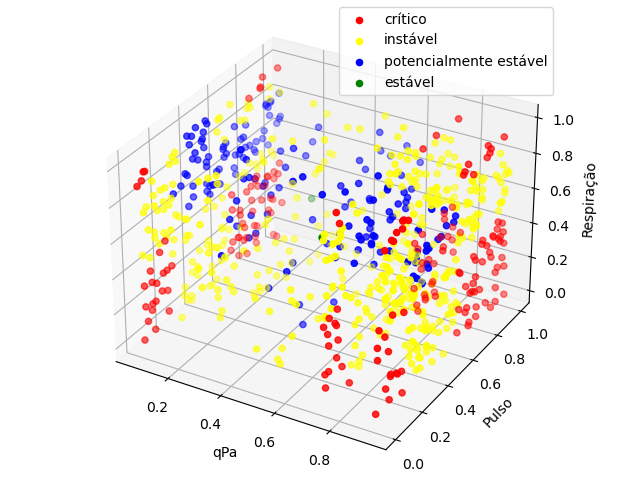

In [6]:
%matplotlib widget
import pandas as pd
from helper import load_normalized_data_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X_variables, y_variables = load_normalized_data_classification()

X_train, X_test, y_train, y_test = train_test_split(X_variables, y_variables, test_size=0.3, random_state=10)

clf = RandomForestClassifier(n_estimators=1000, random_state=0)
clf.fit(X_train, y_train)

y_test = y_test.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

#previsao
predict = clf.predict(X_test)
df_predict = pd.DataFrame()
df_predict['real'] = y_test
df_predict['previsao'] = predict
df_predict['erro'] = abs(df_predict['real'] - df_predict['previsao'])

fig = plt.figure()
ax = Axes3D(fig)

df_plot = X_variables.join(y_variables)
colors = ['red','yellow','blue','green']
labels = ['crítico', 'instável', 'potencialmente estável', 'estável']
for i in range(1,5):
    df_aux = df_plot[df_plot['classe'] == i]
    ax.scatter(df_aux['qPa'], df_aux['pulso'], df_aux['resp'], color=colors[i-1], label=labels[i-1])
    
ax.legend(labels)

ax.set_xlabel('qPa')
ax.set_ylabel('Pulso')#fc8d62
ax.set_zlabel('Respiração')

plt.show()
plt.savefig('graficos/plot_dados_classificacao.svg')

/tmp/ipykernel_21344/660172166.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


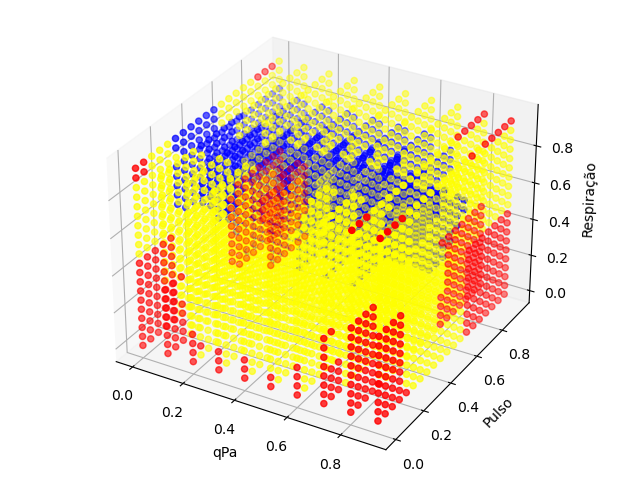

In [29]:
import numpy as np
qpa_array = pd.DataFrame(np.arange(0, 1, 0.1), columns = ['qPa'])
pulso_array = pd.DataFrame(np.arange(0,1,0.05), columns = ['pulso'])
resp_array = pd.DataFrame(np.arange(0,1,0.05), columns = ['resp'])
df = pd.merge(pd.merge(qpa_array, pulso_array, how='cross'),resp_array, how='cross')
df
pred_array = clf.predict(df)

fig = plt.figure()
ax = Axes3D(fig)

df_plot = pd.concat((df, pd.DataFrame(pred_array, columns = ['classe'])), axis=1)
colors = ['red','yellow','blue','green']
for i in range(1,5):
    df_aux = df_plot[df_plot['classe'] == i]
    ax.scatter(df_aux['qPa'], df_aux['pulso'], df_aux['resp'], color=colors[i-1])


ax.set_xlabel('qPa')
ax.set_ylabel('Pulso')#fc8d62
ax.set_zlabel('Respiração')

plt.show()